## 5 - ARMA Models

### 5.1 Partial Autocorrelation Function (PACF)
**Definition**:
PACF measures the correlation between observations with lags, accounting for the values of shorter lags.

**Difference between ACF and PACF**:
"Partial autocorrelation removes the influence of intermediate lags, providing a clearer picture of the direct relationship between a variable and its past values. Unlike autocorrelation, partial autocorrelation focuses on the direct correlation at each lag."


**Use of PACF in identifying the order of AR models**:
Peaks or significant values in PACF at specific lags can indicate potential orders for autoregressive (AR) terms in time series models.

(From https://www.geeksforgeeks.org/autocorrelation-and-partial-autocorrelation/)

<Figure size 1400x700 with 0 Axes>

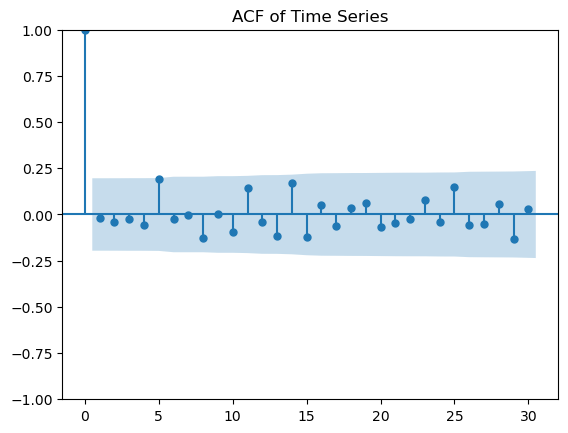

<Figure size 1400x700 with 0 Axes>

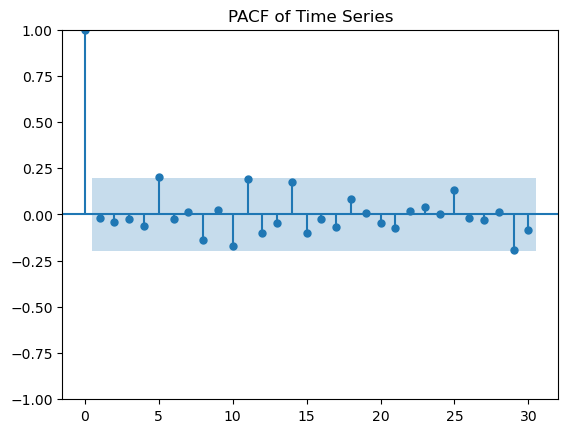

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a stationary time series
np.random.seed(42)
n = 100
data = np.random.normal(loc=0, scale=1, size=n)
ts = pd.Series(data)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(14, 7))
plot_acf(ts, lags=30, title='ACF of Time Series')
plt.show()

plt.figure(figsize=(14, 7))
plot_pacf(ts, lags=30, title='PACF of Time Series')
plt.show()

### 5.2 Autoregressive Moving Average (ARMA) Models
**Definition**: components: AR(p) and MA(q)
$$\begin{equation*}
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \ldots + \theta_q \epsilon_{t-q} + \epsilon_t
\end{equation*}$$



### 5.3 Model Identification Using ACF and PACF

Identifying the order of AR(p) and MA(q) components
Interpreting ACF and PACF plots:
- AR(p) Model: PACF cuts off after lag p, ACF tails off

- MA(q) Model: ACF cuts off after lag q, PACF tails off

- ARMA(p,q) Model: Both ACF and PACF tail off

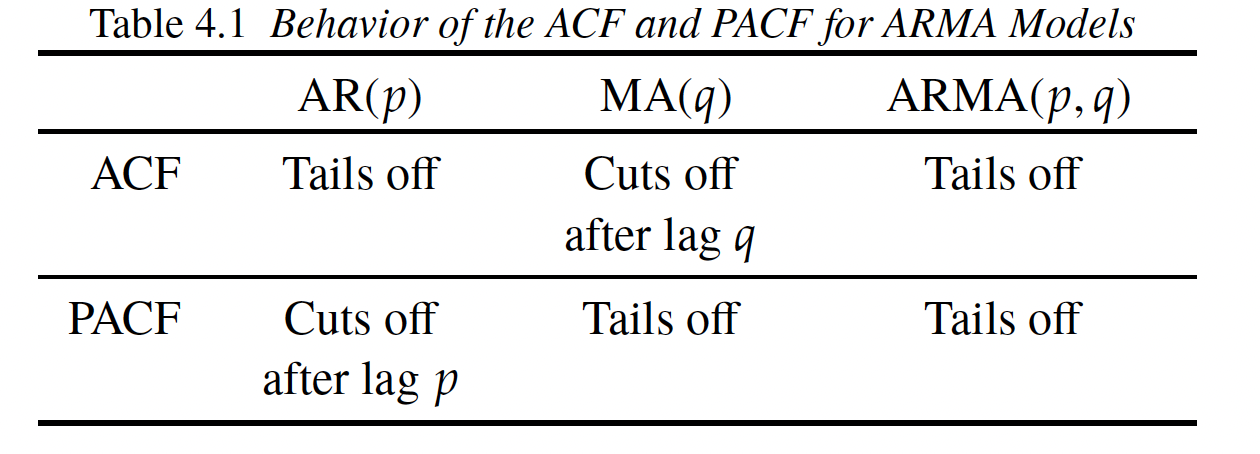
(Image adapted from *Time Series A Data Analysis Approach Using R*)

### 5.4 Estimation of ARMA Models
- Parameter estimation using the method of moments and maximum likelihood estimation (MLE)

- Using `statsmodels` to fit ARMA models

- Residual analysis to check model fit

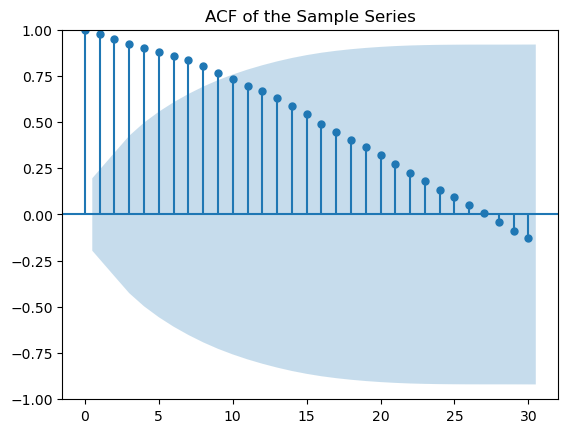

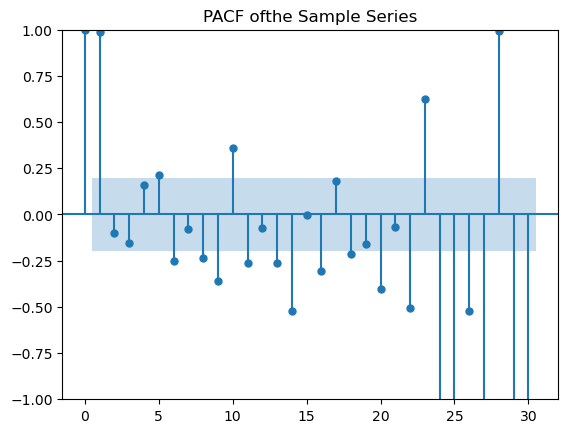

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -141.183
Date:                Tue, 23 Jul 2024   AIC                            292.366
Time:                        19:03:29   BIC                            305.392
Sample:                    01-01-2020   HQIC                           297.638
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9196      3.190     32.888      0.000      98.667     111.172
ar.L1          0.9652      0.024     39.984      0.000       0.918       1.013
ma.L1          0.0720      0.096      0.751      0.4

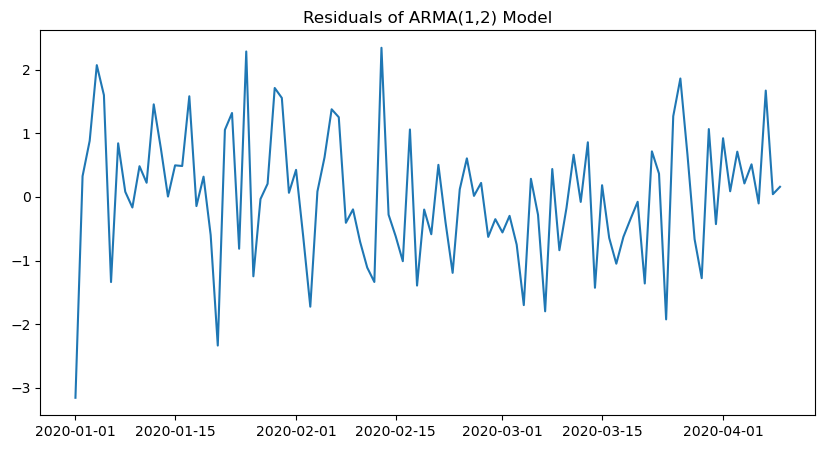

In [82]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Generate a sample time series
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100)
data = np.cumsum(np.random.randn(100)) + 100
df = pd.DataFrame(data, index=dates, columns=['Value'])

# Plot ACF and PACF
plot_acf(df, lags=30, ax=plt.gca())
plt.title('ACF of the Sample Series')
plt.show()

plot_pacf(df, lags=30, ax=plt.gca())
plt.title('PACF ofthe Sample Series')
plt.show()

# Fit an ARMA model
arma_model = ARIMA(df, order=(1, 0, 2)).fit()
print(arma_model.summary())

# Plot the residuals
residuals = arma_model.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of ARMA(1,2) Model')
plt.show()

## 6 - ARIMA Models

### 6.1 Autoregressive Integrated Moving Average (ARIMA) Models
**Definition**: components: AR(p), I(d), MA(q)
$$\begin{equation*}
(1 - \phi_1 L - \phi_2 L^2 - \ldots - \phi_p L^p)(1 - L)^d X_t = (1 + \theta_1 L + \theta_2 L^2 + \ldots + \theta_q L^q) \epsilon_t
\end{equation*}
$$

### 6.2 Model Selection and Differencing

- Identifying the order of differencing (d)

- Stationarity and how to achieve it

- Using ACF and PACF plots to determine AR(p) and MA(q) components after differencing

### 6.3 Fitting ARIMA Models in Python

- Using `statsmodels` to fit ARIMA models

- Model diagnostics and residual analysis

- Forecasting with ARIMA models

ADF Statistic: -9.158402
p-value: 0.000000
Critical Values:
   1%, -3.4989097606014496
Critical Values:
   5%, -2.891516256916761
Critical Values:
   10%, -2.5827604414827157


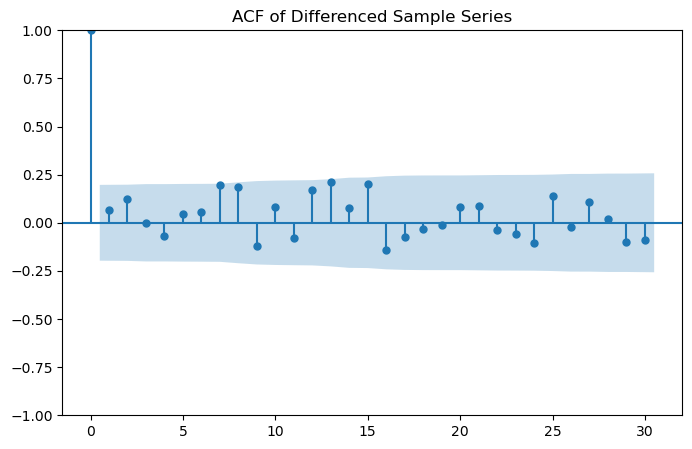

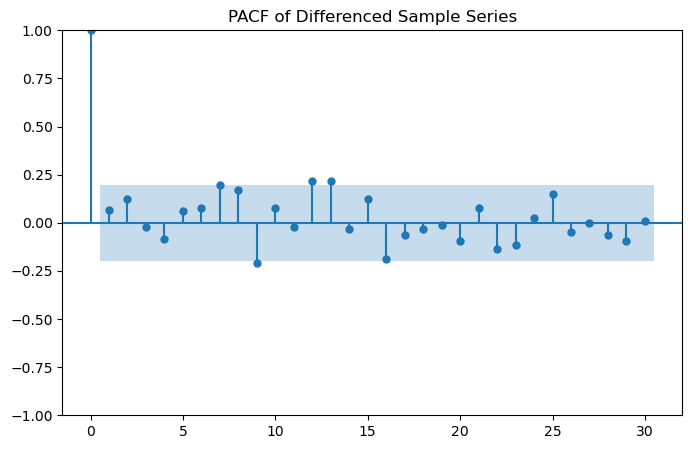

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -139.082
Date:                Tue, 23 Jul 2024   AIC                            284.163
Time:                        19:42:16   BIC                            291.949
Sample:                    01-01-2020   HQIC                           287.313
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9450      0.082     11.491      0.000       0.784       1.106
ma.L1         -0.8819      0.115     -7.687      0.000      -1.107      -0.657
sigma2         0.9707      0.147      6.591      0.0

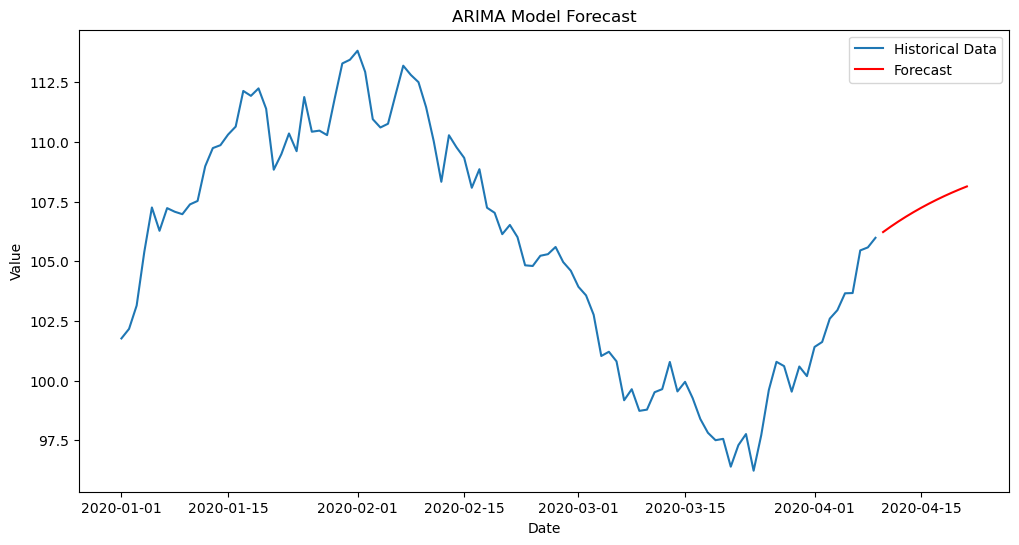

In [90]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Ignore warnings
warnings.filterwarnings('ignore')

# Generate sample data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100)
data = np.cumsum(np.random.randn(100)) + 100
df = pd.DataFrame(data, index=dates, columns=['Value'])

diff_df = df.diff().dropna()

# Check stationarity
adf = adfuller(diff_df.dropna())
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
for key, value in adf[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# Plot ACF and PACF for differenced data
plt.figure(figsize=(8, 5))
plot_acf(diff_df, lags=30, ax=plt.gca())
plt.title('ACF of Differenced Sample Series')
plt.show()

plt.figure(figsize=(8, 5))
plot_pacf(diff_df, lags=30, ax=plt.gca())
plt.title('PACF of Differenced Sample Series')
plt.show()

# Fit an ARIMA model
model = ARIMA(df, order=(1, 1, 1))  # Adjust (p, d, q) as needed
results = model.fit()

# Print model summary to check parameter estimates
print(results.summary())

# Forecast future values
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Create a Series for the forecast starting immediately after the last date
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast_mean, index=forecast_index)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Historical Data')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### 6.3 Model Selection
Selection Criterion:
- Akaike Information Criterion (AIC): The model with the lowest AIC has the lowest entropy relative to the unknown “true” model.

- Bayesian Information Criterion (BIC): The model with lowest BIC has the least unexplained variation in the dependent variable.

- In general, models with lower AIC and BIC are preferred, but not always.


### Exercises
1. Find a good model to MFST closing prices to the best of you can. 

The steps include 
- plot the series; 

- find the proper order for differencing; 

- plot acf and pacf and find the proper orders for AR and MA;

- choose some ARIMA models based on the previous information;

- compare the models based on information criteria and select the best one.